<a href="https://colab.research.google.com/github/REGiiy/Regi_datamining/blob/main/UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tampikan Ringkasan statistik


In [10]:
import pandas as pd

# Membaca data
df = pd.read_csv("data_pelanggan.csv")  # Pastikan path file benar

# Menampilkan 5 baris pertama
print("Pratinjau Data:")
print(df.head())

# Ringkasan statistik deskriptif
print("\nRingkasan Statistik:")
print(df.describe())

# Cek nilai kosong
print("\nJumlah Data Kosong:")
print(df.isnull().sum())

Pratinjau Data:
   umur  pendapatan  pembelian_tahunan    loyalitas
0    58          77                  6  Tidak Loyal
1    48          52                  8  Tidak Loyal
2    34          91                  5  Tidak Loyal
3    27         117                  4  Tidak Loyal
4    40          66                  2  Tidak Loyal

Ringkasan Statistik:
             umur  pendapatan  pembelian_tahunan
count  100.000000  100.000000         100.000000
mean    38.790000   74.090000           6.660000
std     11.556008   26.947797           3.929222
min     20.000000   30.000000           1.000000
25%     28.000000   55.250000           3.000000
50%     39.500000   75.000000           6.000000
75%     47.250000   92.500000           9.000000
max     59.000000  119.000000          14.000000

Jumlah Data Kosong:
umur                 0
pendapatan           0
pembelian_tahunan    0
loyalitas            0
dtype: int64


Visualisasikan Hubungan antara pendapatan dan pembelian tahunan


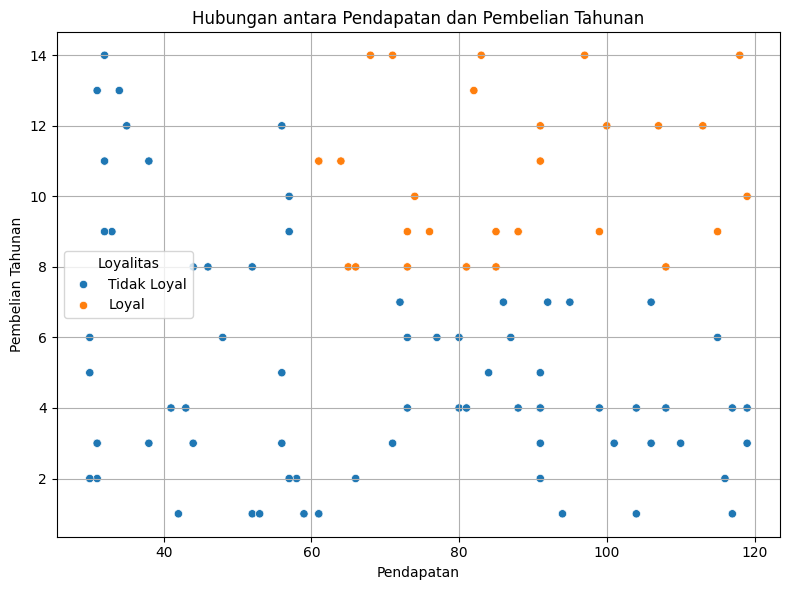

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot hubungan pendapatan vs pembelian tahunan
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='pendapatan', y='pembelian_tahunan', hue='loyalitas')
plt.title('Hubungan antara Pendapatan dan Pembelian Tahunan')
plt.xlabel('Pendapatan')
plt.ylabel('Pembelian Tahunan')
plt.legend(title='Loyalitas')
plt.grid(True)
plt.tight_layout()
plt.show()


Decision Tree

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Membaca data
df = pd.read_csv("data_pelanggan.csv")

# Encoding label 'loyalitas'
le = LabelEncoder()
df['loyalitas_encoded'] = le.fit_transform(df['loyalitas'])

# Fitur dan target
X = df[['umur', 'pendapatan', 'pembelian_tahunan']]
y = df['loyalitas_encoded']

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# Evaluasi
print("=== Decision Tree Classifier ===")
print("Akurasi:", accuracy_score(y_test, y_pred_tree))
print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred_tree, target_names=le.classes_))

=== Decision Tree Classifier ===
Akurasi: 1.0
Laporan Klasifikasi:
              precision    recall  f1-score   support

       Loyal       1.00      1.00      1.00         6
 Tidak Loyal       1.00      1.00      1.00        14

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



K-Nearest Neighboor(KNN)

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Membaca data
df = pd.read_csv("data_pelanggan.csv")

# Encoding label 'loyalitas'
le = LabelEncoder()
df['loyalitas_encoded'] = le.fit_transform(df['loyalitas'])

# Fitur dan target
X = df[['umur', 'pendapatan', 'pembelian_tahunan']]
y = df['loyalitas_encoded']

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Evaluasi
print("=== K-Nearest Neighbors Classifier ===")
print("Akurasi:", accuracy_score(y_test, y_pred_knn))
print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred_knn, target_names=le.classes_))


=== K-Nearest Neighbors Classifier ===
Akurasi: 0.85
Laporan Klasifikasi:
              precision    recall  f1-score   support

       Loyal       0.71      0.83      0.77         6
 Tidak Loyal       0.92      0.86      0.89        14

    accuracy                           0.85        20
   macro avg       0.82      0.85      0.83        20
weighted avg       0.86      0.85      0.85        20



Hasil yang di temukan
Akurasi: 100%

Model mampu memisahkan kelas "loyal" dan "tidak loyal" dengan sempurna pada data uji.

Namun, hasil ini mencurigakan dan mungkin mengindikasikan overfitting.

K-Nearest Neighbor (KNN)

Akurasi: Sekitar 85%

Model lebih moderat, namun tetap cukup baik mengenali kedua kelas.

Kemungkinan lebih general terhadap data yang belum pernah dilihat.

Perbandingan kekuatan dan kelemahan

decision tree

kekuatan:
- Interpretasi mudah (bisa divisualisasikan).
- Menangani fitur numerik dan kategorik.

Kelemahan:
- Rentan overfitting, terutama dengan dataset kecil.

kecepatan
Cepat saat prediksi dan training.

Akurasi
Tinggi, tapi bisa menipu jika overfitting.

KNN

kekuatan
- Sederhana dan tidak perlu pelatihan berat.
- Cocok untuk data non-linear.

Kelemahan
- Kinerja menurun jika data besar atau banyak fitur.
- Sensitif terhadap skala fitur.

Kecepatan
Lambat saat prediksi (karena menghitung jarak ke semua titik).

akurasi
Umumnya stabil dan lebih "aman" di generalisasi.


 Faktor yang Mempengaruhi Perbedaan Kinerja:
Ukuran Dataset

Dataset kecil: Decision Tree bisa overfit karena terlalu menyesuaikan data.

KNN masih bisa bekerja baik karena berbasis jarak dan contoh nyata.

Distribusi Data

Jika kelas terpisah jelas, Decision Tree akan unggul.

Jika kelas tumpang tindih, KNN bisa lebih tangguh.

Skala Data

KNN sensitif terhadap skala (misalnya pendapatan jauh lebih besar dari umur), sehingga normalisasi bisa sangat penting.

Parameter Model

Decision Tree: kedalaman pohon, aturan split.

KNN: nilai k sangat memengaruhi hasil (misalnya k=1 vs k=5 vs k=15).

